In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [2]:
forest_fires = pd.read_csv('forestfires.csv')
forest_fires.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
print("Number of instances in dataset = {}".format(forest_fires.shape[0]))
print("Total number of columns = {}".format(forest_fires.columns.shape[0]))
print("Column wise count of null values:-")
print(forest_fires.isnull().sum())

Number of instances in dataset = 517
Total number of columns = 13
Column wise count of null values:-
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [4]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


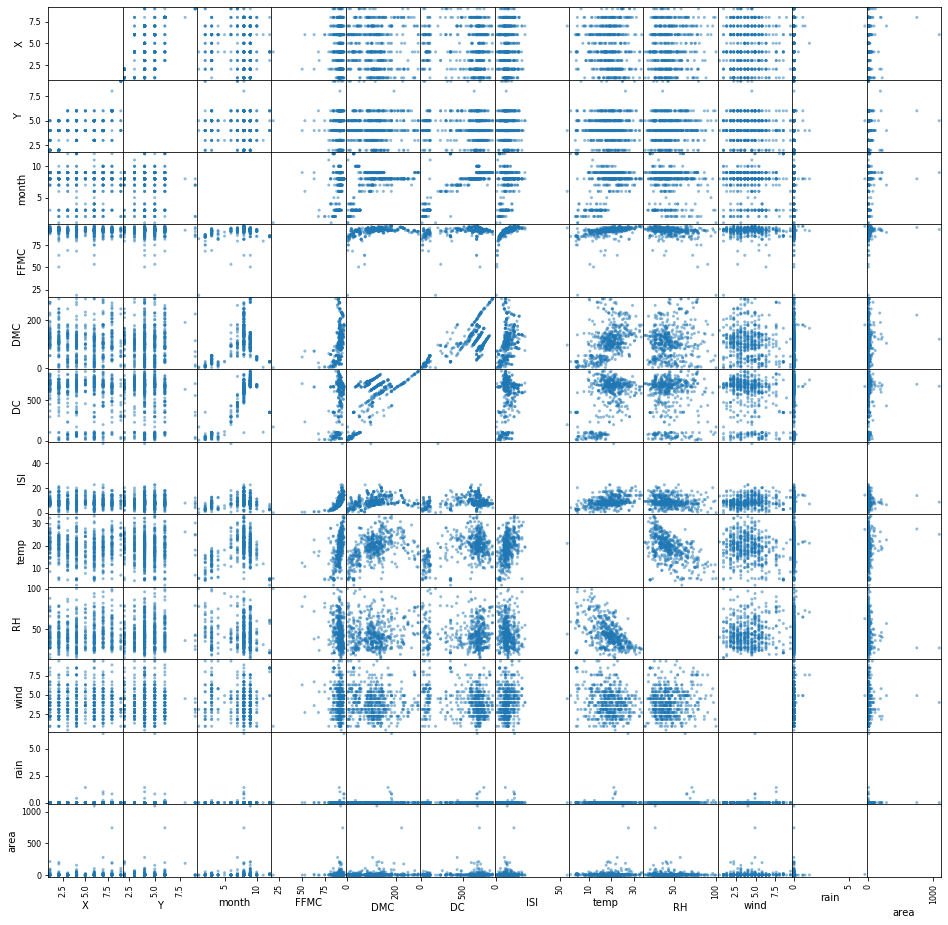

In [7]:
temp_cols=["X","Y","month","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]
area_scatter = pd.plotting.scatter_matrix(forest_fires[temp_cols], diagonal="kwds", figsize=(16, 16))

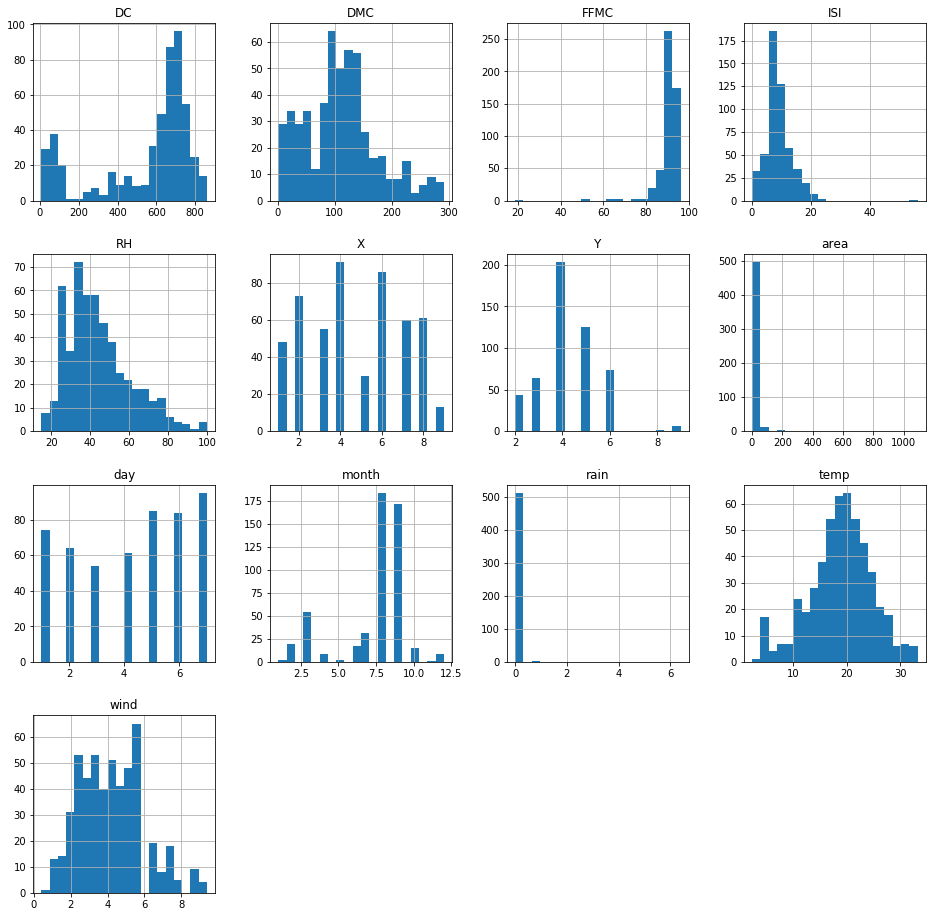

In [8]:
histograms = forest_fires.hist(figsize=(16, 16), bins=20)

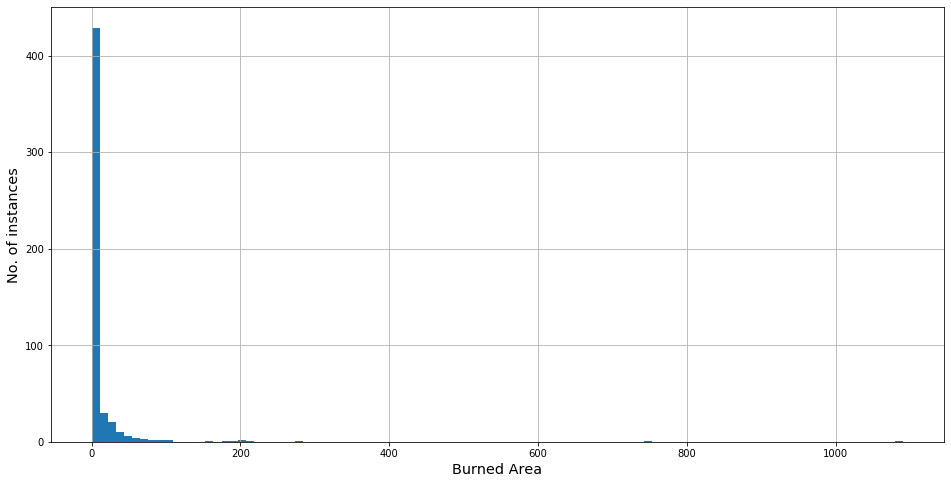

In [9]:
plt.xlabel("Burned Area", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")
forest_fires["area"].hist(figsize=(16, 8), bins=100)

In [10]:
from itertools import combinations
from scipy.stats import pearsonr
for pair in combinations(forest_fires.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(forest_fires[col_1], forest_fires[col_2])
    # Check for high correlation
    if corr_coef >0.86 or corr_coef <-0.52:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : month, DC
Correlation coefficient : 0.8686977586017981
p-value : 3.041370798945921e-159
Column pair : temp, RH
Correlation coefficient : -0.5273903386376686
p-value : 2.360985626126753e-38


In [11]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [12]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [13]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

In [14]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

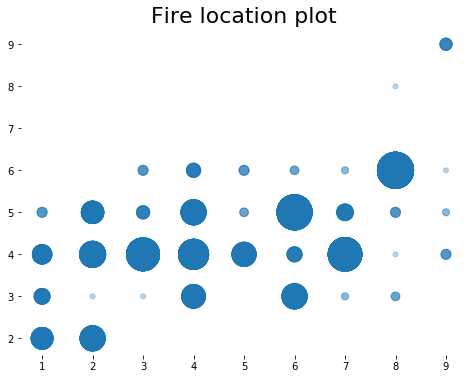

In [15]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

In [16]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

In [17]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
        positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


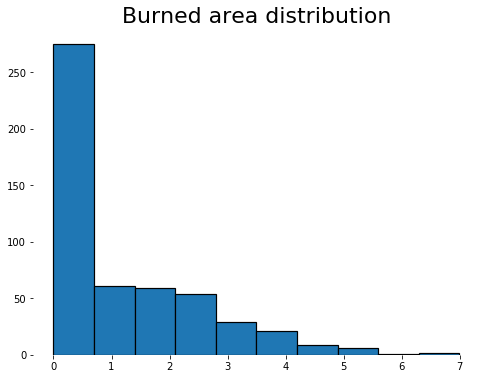

In [18]:
log_area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(log_area_values, title = "Burned area distribution")

In [19]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, log_area_values, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

In [20]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y)**0.5)
variance_score.append(r2_score(test_y, predicted_y))

Coefficients: 
 [ 0.02076866  0.0446716   0.07781323  0.01695166  0.00163425  0.00167288
 -0.00039887 -0.02166109 -0.00787768 -0.01151378  0.06653255  0.16424973]

Mean squared error:  2.3493824383659865
Variance score: 0.00


In [21]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


Mean squared error:  4.112657198930619
Variance score: -0.75


In [22]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

# 使用网格搜索法，选择SVM回归中的最佳C值、epsilon值和gamma值
epsilon = np.arange(0.1, 1.5, 0.2)
C= np.arange(0.1, 1, 0.2)
gamma = np.arange(0.001, 0.01, 0.002)
parameters = {'epsilon':epsilon, 'C':C, 'gamma':gamma}
grid_svr = GridSearchCV(estimator = svm.SVR(), param_grid = parameters,
            scoring = 'neg_mean_squared_error', cv = 5, verbose = 1, n_jobs = 2)
# 模型在训练数据集上的拟合
grid_svr.fit(train_x, train_y)
# 返回交叉验证后的最佳参数值
print(grid_svr.best_params_, grid_svr.best_score_)
# 模型在测试集上的预测
pred_grid_svr = grid_svr.predict(test_x)
# 计算模型在测试集上的MSE值
print("Mean squared error: ", mean_squared_error(test_y, pred_grid_svr))
print('Variance score: %.2f' % r2_score(test_y, pred_grid_svr))

mse_values.append(mean_squared_error(test_y, pred_grid_svr))
variance_score.append(r2_score(test_y, pred_grid_svr))

Mean squared error:  2.6007960697198986
Variance score: -0.10
Fitting 5 folds for each of 175 candidates, totalling 875 fits


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 142 tasks      | elapsed:    3.6s


{'C': 0.7000000000000001, 'epsilon': 0.7000000000000001, 'gamma': 0.005} -1.736066773554041
Mean squared error:  2.504094726437477
Variance score: -0.06


[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed:   10.7s finished
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


Mean squared error:  2.893340625536049
Variance score: -0.23


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


Mean squared error:  2.3749820833913806
Variance score: -0.01


In [25]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

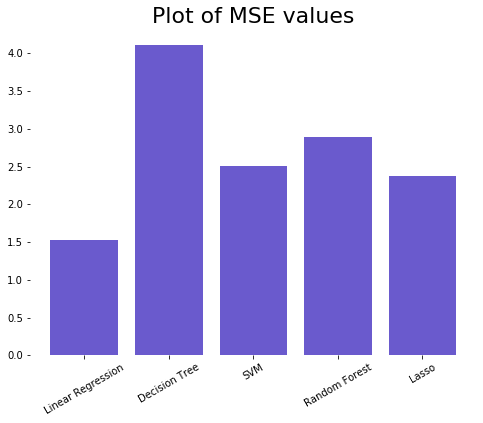

In [26]:
ticks = ["Linear Regression", "Decision Tree","SVM", "Random Forest","Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

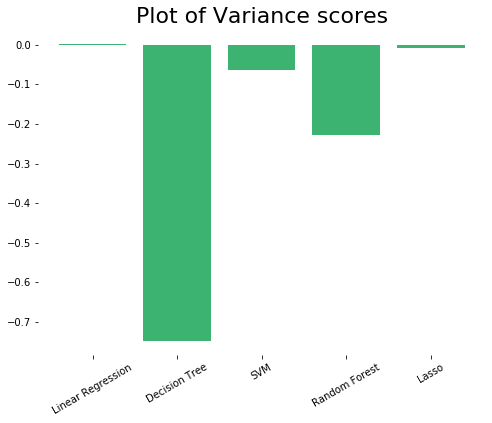

In [27]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)





In [28]:
# 目标值转为二进制
binary_area_values = []
count = 0

for value in log_area_values:
    if(value == 0):
        binary_area_values.append(0)
    else:
        binary_area_values.append(1)

In [29]:
accuracy_values = []
# 拆分数据集
train_x, test_x, train_y, test_y = train_test_split(attribute_list, binary_area_values, test_size=0.15, random_state = 4)

In [30]:
sgd = linear_model.SGDClassifier()
sgd.fit(train_x, train_y)
predicted_y = sgd.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + "%.")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
The accuracy score is 48.717948717948715%.


In [31]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + "%.")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 0 1]
The accuracy score is 58.97435897435898%.


In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)
predicted_y = naive_bayes.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + "%.")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0]
The accuracy score is 55.12820512820513%.


In [33]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + "%.")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 58.97435897435898%.


In [34]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + "%.")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1
 1 0 0 1]
The accuracy score is 61.53846153846154%.


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


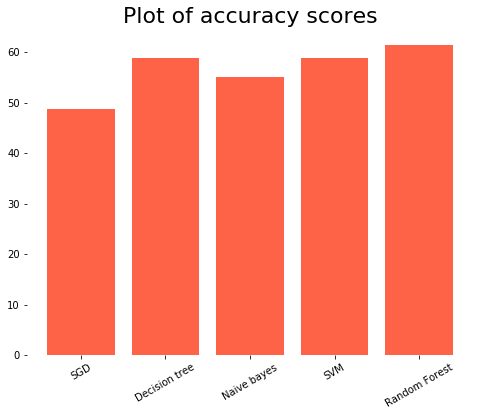

In [35]:
ticks = ["SGD", "Decision tree", "Naive bayes", "SVM", "Random Forest"]
generate_plot("Plot of accuracy scores", ticks, accuracy_values, 2)
